In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "100"
plt.style.use("/afs/ihep.ac.cn/users/f/fuys/.config/matplotlib/Paper.mplstyle")

In [2]:
# data_room = pd.read_csv("/dybfs2/nEXO/fuys/data/aslc_data/11-20-3Hall-4layer/C3room-T-112000000.csv",usecols=["Ampl"]) # mv
# data_zero = pd.read_csv("/dybfs2/nEXO/fuys/data/aslc_data/11-20-3Hall-4layer/C3zero-T-112000000.csv",usecols=["Ampl"]) # mv
# data_neg30 = pd.read_csv("/dybfs2/nEXO/fuys/data/aslc_data/11-20-3Hall-4layer/C3neg30-T-112000000.csv",usecols=["Ampl"]) # mv
# data_neg60 = pd.read_csv("/dybfs2/nEXO/fuys/data/aslc_data/11-20-3Hall-4layer/C3neg60-T-112000000.csv",usecols=["Ampl"]) # mv

# data_neg90 = pd.read_csv("/dybfs2/nEXO/fuys/data/aslc_data/11-20-3Hall-4layer/C3neg90-T-112000000.csv",usecols=["Ampl"]) # mv
data_neg106 = pd.read_csv("/dybfs2/nEXO/fuys/data/aslc_data/11-20-3Hall-4layer/C3neg110-T-112000000.csv",usecols=["Ampl"]) # mv

In [3]:
package_len = 1000
data_T = 100
# print(len(data_room)/(33*package_len))

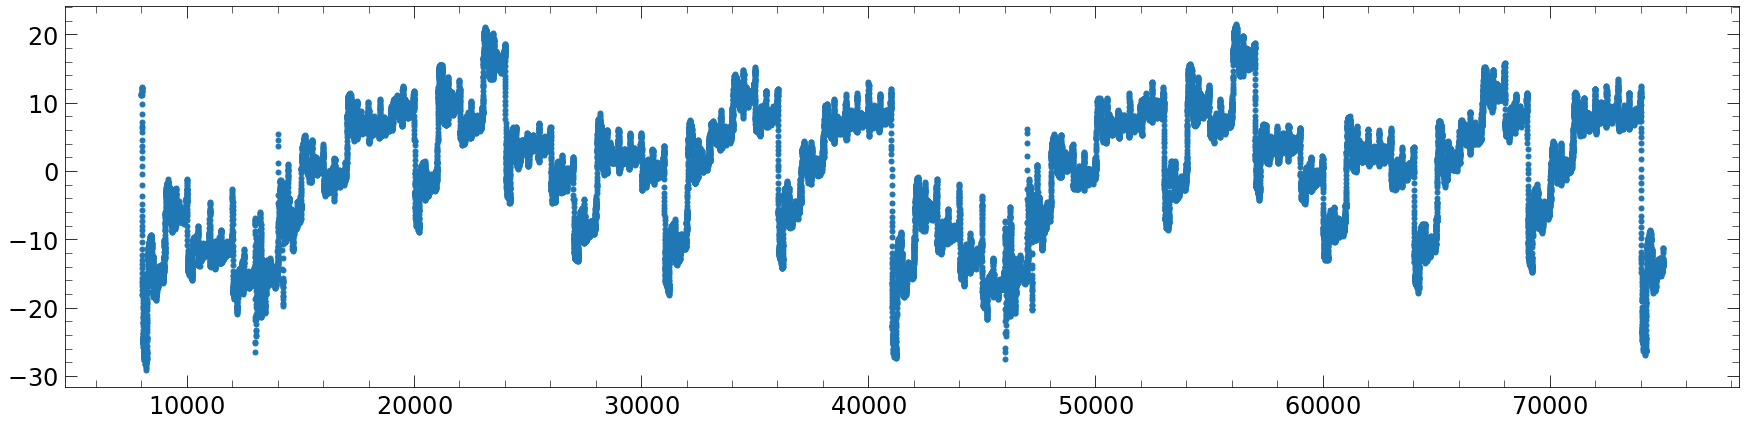

In [4]:
chan_dict={}
for chan in range(33):
    chan_dict[str(chan)] = np.array([])

# cut_point = 8000#  room T
# cut_point = 8000#  zero T
# cut_point = 8000#  30 T
# cut_point = 8000#  60 T
# cut_point = 8000#  90 T

cut_point = 8000#  106 T
sam_points = 1000

# sel_data = data_room[cut_point:cut_point+package_len*33*data_T]*1000# mv
# sel_data = data_zero[cut_point:cut_point+package_len*33*data_T]*1000# mv
# sel_data = data_neg30[cut_point:cut_point+package_len*33*data_T]*1000# mv
# sel_data = data_neg60[cut_point:cut_point+package_len*33*data_T]*1000# mv
# sel_data = data_neg90[cut_point:cut_point+package_len*33*data_T]*1000# mv


sel_data = data_neg106[cut_point:cut_point+package_len*33*data_T]*1000# mv

all_useful_data = np.array([])
for index in range(0, data_T):

    select_data= sel_data[index*package_len*33:(index+1)*package_len*33]
    
    # select_data = select_data[1000:] - select_data[:-1000]
    
    all_useful_data = np.concatenate((all_useful_data, select_data), axis=None)


    for chann in range(32):

        data = select_data[chann*1000:(chann+1)*1000] 
        """strange   """            
        # data = np.array(select_data[(chann+1)*sam_points:(chann+2)*sam_points])  - np.array(select_data[chann*sam_points:(chann+1)*sam_points])
       
        # result = np.append(data[200:400],data[600:800])
        result = data[650:750]
        # result = data[600:630]
       
        array_index = chann % 33
        chan_dict[str(array_index)] = np.append(chan_dict[str(array_index)], result)


fig, ax = plt.subplots(figsize=(30, 7))
plt.plot( sel_data[0:67000],'.')


0.6815705363338771
0.6952615506840358
2.7591786661858393
1.6073129298110622
1.3122236817134658
0.7386231099937957
0.6674760063532238
0.8508696946521652
0.753482517221326
0.7175361128009559
0.6803526337630478
0.7324811910426184
0.7273171322593625
0.671194671825376
0.6882710071804111
0.6736806074638404
0.7001026798125493
0.7439246442202863
0.8459310281781527
0.6885132807895993
0.7280459613069792
0.5804690826432061
0.7455644990385659
0.826990430708731
0.7805939779295136
0.702825301233243
0.7770474482441305
0.6575404788698801
0.7238054117294418
0.6835096217391642
0.6922156844092241
0.7548733450992884
nan


/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


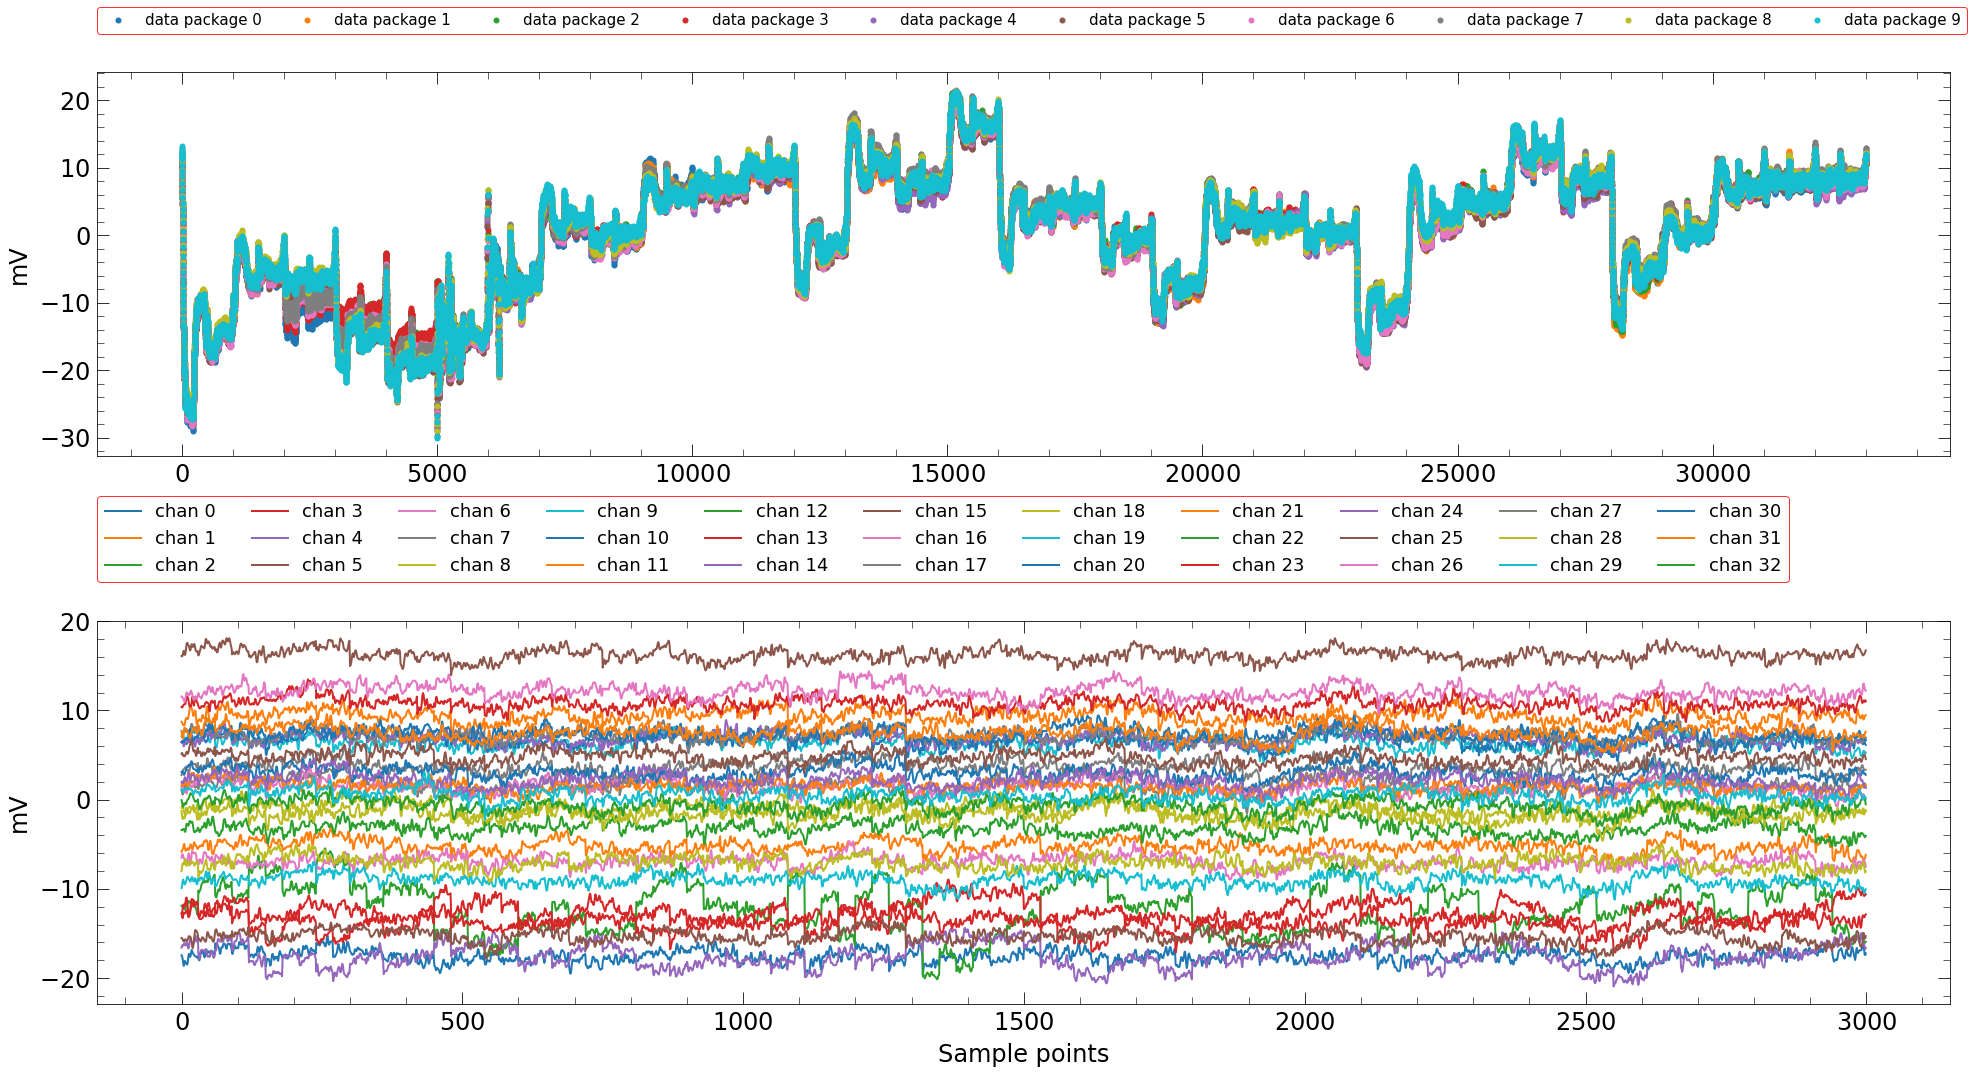

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(30, 15))
dis_chan_range = [0,33]
for n in range(0,10):
    ax[0].plot(all_useful_data[dis_chan_range[0]*1000+33000*n:dis_chan_range[1]*1000+33000*n],\
               '.',label="data package %s"%n)

for index in range(33):
    # if index == 32:
    ax[1].plot(chan_dict[str(index)],label='chan %s'%index)
    print(np.std(chan_dict[str(index)]))

ax[1].set_xlabel("Sample points")
ax[0].set_ylabel("mV")
ax[1].set_ylabel("mV")
# ax.set_ylim(550,675)
ax[0].legend(frameon=True, edgecolor='red',fontsize=15,loc=[0.0,1.1],ncol=11)
ax[1].legend(frameon=True, edgecolor='red',fontsize=18,loc=[0.0,1.1],ncol=11)
plt.tight_layout()
plt.savefig("./plots/waveform_display.pdf")

/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
[304.27, 310.38, 1231.78, 717.55, 585.81, 329.74, 297.98, 379.85, 336.38, 320.33, 303.73, 327.0, 324.7, 299.64, 307.26, 300.75, 312.55, 332.11, 377.65, 307.37, 325.02, 259.14, 332.84, 369.19, 348.48, 313.76, 346.9, 293.54, 323.13, 305.14, 309.02, 337.0]


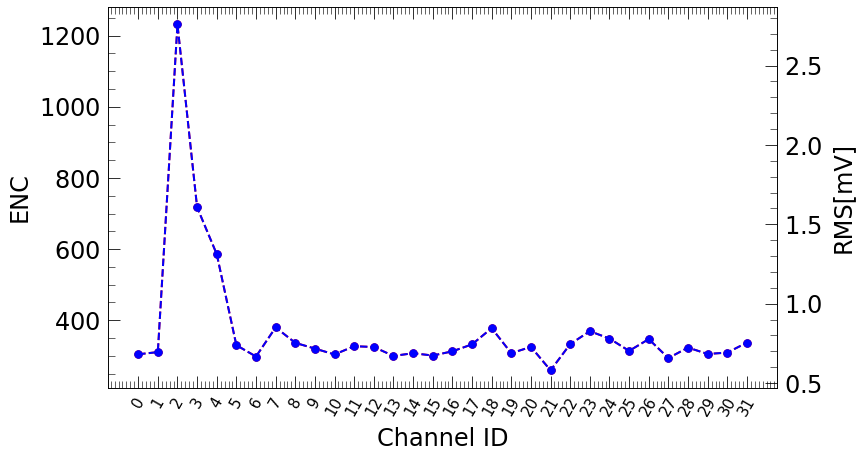

In [6]:
chan_index=[]
ENC_value=[]
Vstd_value=[]
for index, value in chan_dict.items():
    # value = value[50:100]
    # print("std",np.std(value))
    chan_index.append(index)
    ENC_value.append(np.std(value)/14*6250)
    Vstd_value.append(np.std(value))
    # print("Chan: %s V std %0.2f"%(index,np.std(value)))
    # print("ENC",np.std(value)/14*6250)

fig, ax = plt.subplots(figsize=(12, 7))
ax2 = ax.twinx()
ax2.plot(chan_index[0:-1], Vstd_value[0:-1],'.b--',markersize=15)
ax2.set_ylabel("RMS[mV]")

ax.plot(chan_index[0:-1], ENC_value[0:-1],'.r--',markersize=15)
ax.set_xlabel("Channel ID")
ax.set_ylabel("ENC")
ax.set_xticklabels(labels=chan_index,rotation=60,size=15)
plt.savefig("./plots/ENC_results.pdf")

print(chan_index[:-1])
print([round(num, 2) for num in ENC_value[:-1]])

In [7]:

# cut_point = 16000#  room T
#cut_point = 32000#  106 T
# cut_point = 16000#  30 T
# cut_point = 16000#  zero T
# cut_point = 17000#  60 T
# cut_point = 32000#  90 T


# display_point = 8600
# sam_sel_points = 200
# chan_n = 1
# sel_data_room = data_room[16000+display_point:16000+display_point+(sam_sel_points*chan_n)]
# sel_data_zero = data_zero[16000+display_point:16000+display_point+(sam_sel_points*chan_n)]
# sel_data_neg30 = data_neg30[16000+display_point:16000+display_point+(sam_sel_points*chan_n)]
# sel_data_neg106 = data_neg106[32000+display_point:32000+display_point+(sam_sel_points*chan_n)]


# fig, ax = plt.subplots(nrows=2,figsize=(20, 20))
# # ax.plot(sel_data['Time'], sel_data['Ampl'],'.')
# offset =20
# ax[0].plot(np.arange(len(sel_data_room['Ampl'])),sel_data_room['Ampl'] - np.mean(sel_data_room['Ampl']),'.r-',label="room T %0.2f"%np.std(sel_data_room))
# ax[0].plot(np.arange(len(sel_data_room['Ampl'])),sel_data_zero['Ampl']- np.mean(sel_data_zero['Ampl'])+offset,'.b-',label="0 degree %0.2f"%np.std(sel_data_zero))
# ax[0].plot(np.arange(len(sel_data_room['Ampl'])),sel_data_neg30['Ampl']- np.mean(sel_data_neg30['Ampl'])+offset*2,'.c-',label="-30 degree %0.2f"%np.std(sel_data_neg30))
# ax[0].plot(np.arange(len(sel_data_room['Ampl'])),sel_data_neg106['Ampl']- np.mean(sel_data_neg106['Ampl'])+offset*3,'.m-',label="-106 degree %0.2f"%np.std(sel_data_neg106))

# ax[0].legend()
# ax[1].legend()
# plt.tight_layout()
# # ax2.plot(sel_data['Time'],'.r')

NameError: name 'data_room' is not defined